In [1]:
from keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt
(xtrain,ytrain),(xtest,ytest)=load_data()
print('Train Shape:\t',xtrain.shape,ytrain.shape)
print()
print('Test shape:\t',xtest.shape,ytest.shape)


170498071/170498071 [==============================] - 271s 2us/step
Train Shape:	 (50000, 32, 32, 3) (50000, 1)

Test shape:	 (10000, 32, 32, 3) (10000, 1)


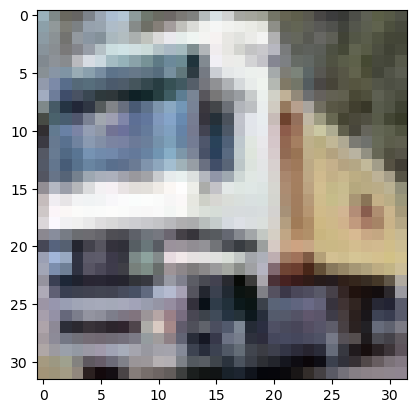

In [2]:
plt.imshow(xtrain[1],cmap='gray')

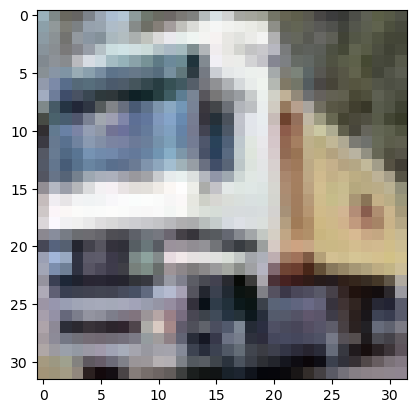

In [3]:
plt.imshow(xtrain[1],cmap='gray_r')

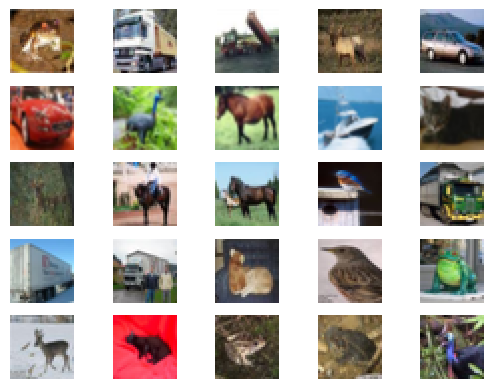

In [4]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(xtrain[i],cmap='gray_r')
    
plt.show()

In [8]:
#import a;; required lib
from keras.layers import Dense
from keras.layers import Conv2D,Flatten,Dropout
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import Sequential

In [9]:
def discriminator(in_shape=(32,32,3)):
    model=Sequential()
   
    #1st conv layer
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same',
                     input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    #2nd conv layer
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    #converting higher dimention to 1D
    model.add(Flatten())
    
    #output layer
    model.add(Dense(1,activation='sigmoid'))
    
    #compile model
    opt=Adam(learning_rate=0.0002,beta_1=0.5)
    
    model.compile(loss='binary_crossentropy',optimizer=opt,
                  metrics=['accuracy'])
                  
    return model
                  
model=discriminator()
model.summary()
#plot the model   



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 64)        0         
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 64)          0         
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              

In [10]:
from numpy import expand_dims,ones,zeros

def load_real_samples():
    (xtrain,_),(_,_)=load_data()
    x=expand_dims(xtrain,axis=-1)
    x=x.astype('float32')
    x=x/255.
    return x

In [11]:
load_real_samples()

array([[[[[0.23137255],
          [0.24313726],
          [0.24705882]],

         [[0.16862746],
          [0.18039216],
          [0.1764706 ]],

         [[0.19607843],
          [0.1882353 ],
          [0.16862746]],

         ...,

         [[0.61960787],
          [0.5176471 ],
          [0.42352942]],

         [[0.59607846],
          [0.49019608],
          [0.4       ]],

         [[0.5803922 ],
          [0.4862745 ],
          [0.40392157]]],


        [[[0.0627451 ],
          [0.07843138],
          [0.07843138]],

         [[0.        ],
          [0.        ],
          [0.        ]],

         [[0.07058824],
          [0.03137255],
          [0.        ]],

         ...,

         [[0.48235294],
          [0.34509805],
          [0.21568628]],

         [[0.46666667],
          [0.3254902 ],
          [0.19607843]],

         [[0.47843137],
          [0.34117648],
          [0.22352941]]],


        [[[0.09803922],
          [0.09411765],
          [0.08235294]],

    

In [13]:
from numpy.random import rand,randint

def generate_real_samples(dataset,n_samples):
    ix=randint(0,dataset.shape[0],n_samples)
    x=dataset[ix]
    
    y=ones((n_samples,1))
    return x,y

In [14]:
generate_real_samples(load_real_samples(),n_samples=10)

(array([[[[[0.16470589],
           [0.21960784],
           [0.14509805]],
 
          [[0.15294118],
           [0.18039216],
           [0.11764706]],
 
          [[0.18431373],
           [0.13725491],
           [0.10196079]],
 
          ...,
 
          [[0.05490196],
           [0.05882353],
           [0.03921569]],
 
          [[0.04705882],
           [0.08235294],
           [0.04705882]],
 
          [[0.07843138],
           [0.13333334],
           [0.09019608]]],
 
 
         [[[0.16078432],
           [0.21568628],
           [0.14117648]],
 
          [[0.16862746],
           [0.18431373],
           [0.1254902 ]],
 
          [[0.23529412],
           [0.18431373],
           [0.14901961]],
 
          ...,
 
          [[0.05882353],
           [0.07058824],
           [0.04705882]],
 
          [[0.05098039],
           [0.08627451],
           [0.05098039]],
 
          [[0.08235294],
           [0.14509805],
           [0.10196079]]],
 
 
         [[[0.14509805],

In [15]:
def generate_fake_samples(n_samples):
    x=rand(32*32*3*n_samples)
    
    x=x.reshape(n_samples,32,32,3)
    
  
    y=zeros((n_samples,1))
    
    return x,y

In [16]:
generate_fake_samples(10)

(array([[[[0.04101658, 0.86334521, 0.34424586],
          [0.46317814, 0.28656483, 0.34376529],
          [0.10121117, 0.50902195, 0.36882361],
          ...,
          [0.10937525, 0.37041263, 0.74795018],
          [0.5589966 , 0.26659311, 0.74704   ],
          [0.41378817, 0.18049562, 0.64625053]],
 
         [[0.38446037, 0.01432902, 0.11725077],
          [0.74535952, 0.48479145, 0.03131483],
          [0.86906712, 0.74608786, 0.15287416],
          ...,
          [0.91445583, 0.17093591, 0.39935691],
          [0.67525821, 0.06350435, 0.35416642],
          [0.07961509, 0.32446218, 0.79029216]],
 
         [[0.94167801, 0.00924468, 0.15139478],
          [0.9445641 , 0.69071883, 0.02473154],
          [0.28233302, 0.19016378, 0.36015388],
          ...,
          [0.96518496, 0.11727948, 0.77863381],
          [0.6116441 , 0.33339733, 0.23159554],
          [0.37101636, 0.2114265 , 0.14884839]],
 
         ...,
 
         [[0.76961185, 0.69981338, 0.91204849],
          [0.02282

In [17]:
def train_discriminative(model,dataset,n_iter=100,n_batch=256):
    half_batch=int(n_batch//2)
    
    for i in range(n_iter):
        
        xreal,yreal=generate_real_samples(dataset,half_batch)
        
        
        AA,real_acc=model.train_on_batch(xreal,yreal)
        
       
        xfake,yfake=generate_fake_samples(half_batch)
        
       
        BB,fake_acc=model.train_on_batch(xfake,yfake)
        
        
        print('>%d real=%.0f%% fake=%.0f%%'%(i+1,real_acc*100,fake_acc*100))
        

In [18]:
model=discriminator()


dataset=load_real_samples()

In [20]:
train_discriminative(model,dataset)

>1 real=95% fake=100%
>2 real=96% fake=100%
>3 real=98% fake=100%
>4 real=95% fake=100%
>5 real=95% fake=100%
>6 real=98% fake=100%
>7 real=93% fake=100%
>8 real=98% fake=100%
>9 real=93% fake=100%
>10 real=96% fake=100%
>11 real=95% fake=100%
>12 real=98% fake=100%
>13 real=94% fake=100%
>14 real=93% fake=100%
>15 real=95% fake=100%
>16 real=98% fake=100%
>17 real=97% fake=100%
>18 real=98% fake=100%
>19 real=96% fake=100%
>20 real=98% fake=100%
>21 real=98% fake=100%
>22 real=98% fake=100%
>23 real=96% fake=100%
>24 real=97% fake=100%
>25 real=96% fake=100%
>26 real=98% fake=100%
>27 real=96% fake=100%
>28 real=97% fake=100%
>29 real=99% fake=100%
>30 real=97% fake=100%
>31 real=98% fake=100%
>32 real=98% fake=100%
>33 real=99% fake=100%
>34 real=97% fake=100%
>35 real=98% fake=100%
>36 real=100% fake=100%
>37 real=99% fake=100%
>38 real=99% fake=100%
>39 real=100% fake=100%
>40 real=99% fake=100%
>41 real=97% fake=100%
>42 real=99% fake=100%
>43 real=99% fake=100%
>44 real=98% fake=

In [21]:
from keras.layers import Reshape
from keras.layers import Conv2DTranspose

def generator(latent_dim):
    model = Sequential()
    
    n_nodes = 128 * 8 * 8
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8, 8, 128)))
    
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
    return model

In [22]:
latent_dim = 100

model = generator(latent_dim)

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8192)              827392    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 8192)              0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 16, 16, 128)       262272    
 anspose)                                                        
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 32, 32, 128)       262272    
 Transpose)                                           

In [23]:
import numpy as np
from numpy.random import randn

def generate_latent_points(latent_dim, n_samples):
    
    x_input = randn(latent_dim * n_samples)
    
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [24]:
def generate_fake_samples(g_model, latent_dim, n_samples):
   
    x_input = generate_latent_points(latent_dim, n_samples)
    
    X = g_model.predict(x_input)
   
    y = zeros((n_samples, 1))
    return X, y


1/1 [==============================] - 0s 337ms/step


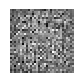

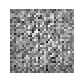

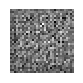

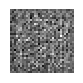

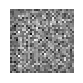

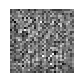

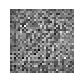

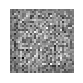

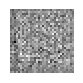

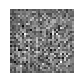

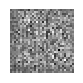

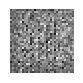

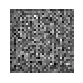

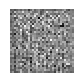

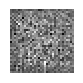

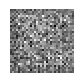

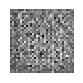

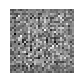

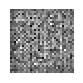

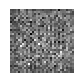

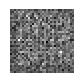

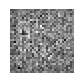

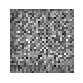

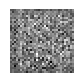

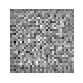

In [25]:
latent_dim = 100

model = generator(latent_dim)

n_samples = 25
x, _ = generate_fake_samples(model, latent_dim, n_samples)

for i in range(n_samples):
   
    plt.subplot(5, 5, 1 + i)
   
    plt.axis('off')
    
    plt.imshow(x[i, :, :, 0], cmap='gray_r')
    
    plt.show()